# SBRC Pandapower Power Flow - Unbalanced Network Validation Plots

Notebook for plotting voltages to validate SBRC pandapower model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import dates
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandapower as pp
import os

In [2]:
os.chdir('/home/brendan/PhD/Python Scripts/ThesisGit/Dist Network Simulations')

In [3]:
sns.set(font_scale=1.35, rc={'figure.figsize':(12,5)})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
matplotlib.rcParams['font.family'] = 'Abyssinica SIL'

### Import SBRC network data

In [4]:
sim_date = '2020-11-04'

In [5]:
sbrc_1 = pd.read_csv('CSV/SBRC Incomer - Hioki PW3198 30sec 20200803 to 20200817.CSV')
sbrc_1.index = pd.to_datetime((sbrc_1['Date']+' '+sbrc_1['Time']), format='%Y/%m/%d %H:%M:%S')

In [6]:
sbrc_2 = pd.read_csv('CSV/SBRC Incomer - Hioki PW3198 30sec 20200826 to 20200930.CSV')
sbrc_2.index = pd.to_datetime((sbrc_2['Date']+' '+sbrc_2['Time']), format='%Y/%m/%d %H:%M:%S')

In [7]:
sbrc_3 = pd.read_csv('CSV/SBRC Incomer - Hioki PW3198 30sec 20201020 to 20201124.CSV')
sbrc_3.index = pd.to_datetime((sbrc_3['Date']+' '+sbrc_3['Time']), format='%Y/%m/%d %H:%M:%S')

In [8]:
sbrc = pd.concat([sbrc_1, sbrc_2, sbrc_3])

<AxesSubplot:>

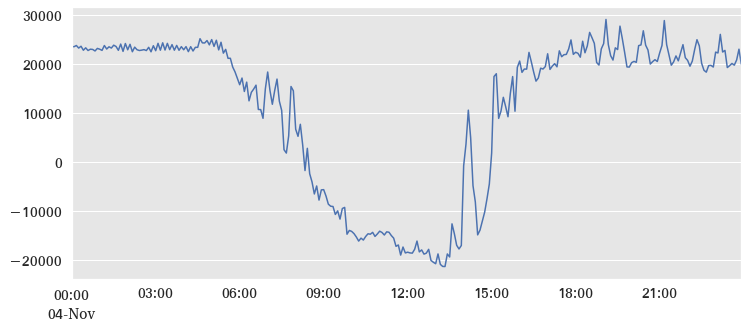

In [9]:
sbrc.loc[sim_date]['AvgP1'].resample('5min').mean().plot()

### Import IFH Data

In [10]:
ifh_1 = pd.read_csv('CSV/IFH SWBD - Hioki PW3198 30sec 20200803 to 20200824.CSV')
ifh_2 = pd.read_csv('CSV/IFH SWBD - Hioki PW3198 30sec 20200824 to 20200910.CSV')
ifh_3 = pd.read_csv('CSV/IFH SWBD - Hioki PW3198 30sec 20200910 to 20201015.CSV')
ifh_4 = pd.read_csv('CSV/IFH SWBD - Hioki PW3198 30sec 20201020 to 20201124.CSV')

In [11]:
ifh = pd.concat([ifh_1, ifh_2, ifh_3, ifh_4])

In [12]:
ifh.index = pd.to_datetime((ifh['Date']+' '+ifh['Time']), format='%Y/%m/%d %H:%M:%S')

<AxesSubplot:>

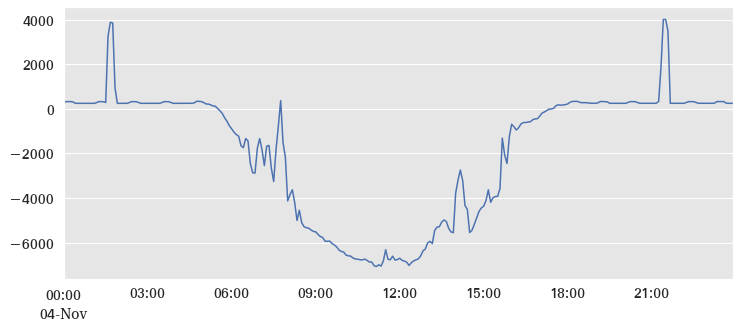

In [13]:
ifh.loc[sim_date]['AvgP3'].resample('5min').mean().plot()

### Import DRH Data

In [14]:
drh_1 = pd.read_csv('CSV/DRH - Hioki 3360 20200806 to 20200817.CSV', skiprows=16)
drh_1.index = pd.to_datetime((drh_1['Date']), format='%Y-%m-%d %H:%M:%S')

In [15]:
drh_2 = pd.read_csv('CSV/DRH SWBD - Hioki PW3360 30sec 20200817 to 20201020.CSV', skiprows=16)
drh_2.index = pd.to_datetime((drh_2['Date']), format='%Y-%m-%d %H:%M:%S')

In [16]:
drh_3 = pd.read_csv('CSV/DRH SWBD - Hioki PW3360 30sec 20202010 to 20201218.CSV', skiprows=16)
drh_3.index = pd.to_datetime((drh_3['Date']), format='%d/%m/%Y %H:%M')

In [17]:
drh = pd.concat([drh_1, drh_2, drh_3])

<AxesSubplot:xlabel='Date'>

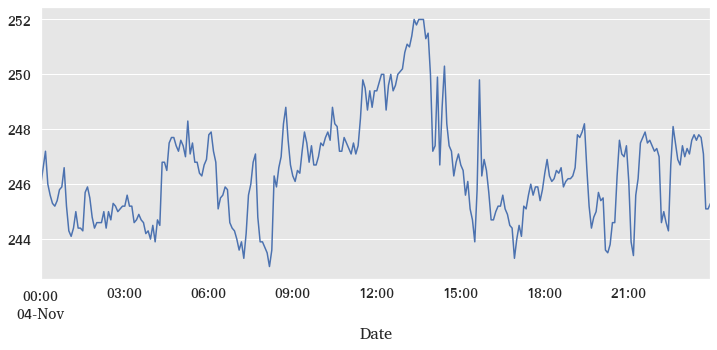

In [18]:
drh.loc[sim_date]['U1_Avg[V]'].resample('5min').mean().plot()
#drh.loc[sim_date]['P3_Avg[W]'].plot()

### Import Kiosk Data

In [19]:
kiosk_1 = pd.read_csv('CSV/Camp East Kiosk - Hioki PW3198 30sec 20200803 to 20200817 with n.CSV')
kiosk_2 = pd.read_csv('CSV/Camp East Kiosk - Hioki PW3198 30sec 20200817 to 20200921 with n.CSV')
kiosk_3 = pd.read_csv('CSV/Camp East Kiosk - Hioki PW3198 30sec 20201019 to 20201123 with n.CSV')

/home/brendan/jupyter_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
kiosk = pd.concat([kiosk_1, kiosk_2, kiosk_3])
kiosk.index = pd.to_datetime((kiosk['Date']+' '+kiosk['Time']), format='%Y/%m/%d %H:%M:%S')

In [21]:
kiosk['AvgPT'] = kiosk['AvgP1']+kiosk['AvgP2']+kiosk['AvgP3']

In [22]:
# sim_date = '2020-09-17'
# #sim_date = '2020-11-16'

<AxesSubplot:>

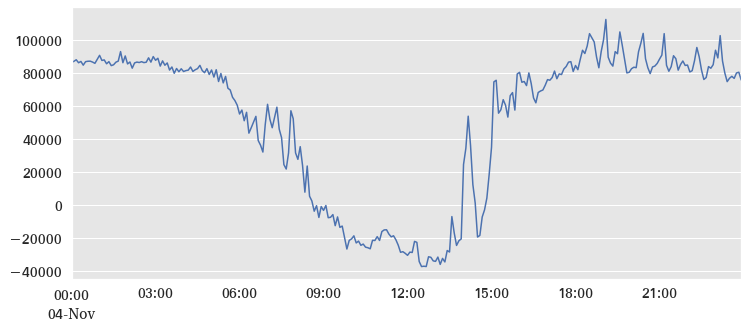

In [23]:
(kiosk.loc[sim_date]['AvgPT'].resample('5min').mean()*3).plot()

In [24]:
kiosk['AvgP3'][kiosk['AvgP3']>15000]

2020-08-03 17:53:30    15050.0
2020-08-03 18:06:30    15380.0
2020-08-03 18:07:00    15910.0
2020-08-03 18:07:30    15410.0
2020-08-03 18:10:00    15800.0
                        ...   
2020-11-19 17:36:00    15210.0
2020-11-19 17:36:30    15610.0
2020-11-19 17:37:00    15290.0
2020-11-19 17:37:30    15400.0
2020-11-19 17:38:00    15070.0
Name: AvgP3, Length: 8209, dtype: float64

### Import PV Data

In [26]:
os.chdir('/home/brendan/PhD/Python Scripts/ThesisGit/Time Series Plots')

## Create Combined DF

In [27]:
mg = pd.DataFrame(index=drh.index)

In [28]:
#Import Kiosk Voltage
mg['TX_Va'] = kiosk['AvgUrms1']
mg['TX_Vb'] = kiosk['AvgUrms2']
mg['TX_Vc'] = kiosk['AvgUrms3']

In [29]:
#Import SBRC Data
mg['SB_Va'] = sbrc['AvgUrms1']
mg['SB_Vb'] = sbrc['AvgUrms2']
mg['SB_Vc'] = sbrc['AvgUrms3']

mg['SB_Pa'] = sbrc['AvgP1']
mg['SB_Pb'] = sbrc['AvgP2']
mg['SB_Pc'] = sbrc['AvgP3']

mg['SB_Qa'] = sbrc['AvgQ1']
mg['SB_Qb'] = sbrc['AvgQ2']
mg['SB_Qc'] = sbrc['AvgQ3']

In [30]:
#Import IFH Data
mg['IF_Vc'] = ifh['AvgUrms3']
mg['IF_Pc'] = ifh['AvgP3']
mg['IF_Qc'] = ifh['AvgQ3']

In [31]:
#Import DRH Data
mg['DR_Va'] = drh['U1_Avg[V]']
mg['DR_Pa'] = drh['P1_Avg[W]']
mg['DR_Qa'] = drh['Q1_Avg[var]']

In [32]:
mg = mg.resample('5min').mean()

## Create Network Model

In [33]:
def time_series_powerflow(scale):
    
    sim_results = pd.DataFrame(index=mg.loc[sim_date].index, columns=['SB_Va', 'SB_Vb', 'SB_Vc', 'IF_Vc', 'DR_Va'])

    for i,idx in enumerate(sim_results.index):

        net = pp.create_empty_network(sn_mva=100)

        cable_25mm = dict(r_ohm_per_km=0.884,
                      x_ohm_per_km=0.0973,
                      c_nf_per_km=0.0,
                      r0_ohm_per_km=0.884,
                      x0_ohm_per_km=0.0973,
                      c0_nf_per_km=0.0,
                      max_i_ka=0.09,
                     )

        cable_95mm = dict(r_ohm_per_km=0.193,
                          x_ohm_per_km=0.09,
                          c_nf_per_km=0.0,
                          r0_ohm_per_km=0.772,
                          x0_ohm_per_km=0.36,
                          c0_nf_per_km=0.0,
                          max_i_ka=0.244,
                         )

        cable_240mm = dict(r_ohm_per_km=0.0754/2,
                          x_ohm_per_km=0.0855/2,
                          c_nf_per_km=0.0,
                          r0_ohm_per_km=0.3016/2,
                          x0_ohm_per_km=0.342/2,
                          c0_nf_per_km=0.0,
                          max_i_ka=0.426,
                         )

        pp.create_std_type(net, cable_25mm, '25mm')
        pp.create_std_type(net, cable_95mm, '95mm')
        pp.create_std_type(net, cable_240mm, '240mm')


        b1 = pp.create_bus(net, vn_kv=0.4, name='LV-TX', geodata=(-34.399961,150.898769))
        b2 = pp.create_bus(net, vn_kv=0.4, name='SBRC',geodata=(-34.400124,150.899592))
        b3 = pp.create_bus(net, vn_kv=0.4, name='PILLAR',geodata=(-34.401032,150.897985))
        b4 = pp.create_bus(net, vn_kv=0.4, name='IFH',geodata=(-34.400898,150.897876))
        b5 = pp.create_bus(net, vn_kv=0.4, name='DRH',geodata=(-34.400762,150.897466))

        pp.create_line(net, from_bus=b1, to_bus=b2, length_km=0.1, name="Line1",std_type='240mm') 
        pp.create_line(net, from_bus=b2, to_bus=b3, length_km=0.3, name="Line2",std_type='95mm') 
        pp.create_line(net, from_bus=b3, to_bus=b4, length_km=0.05, name="Line3",std_type='25mm') 
        pp.create_line(net, from_bus=b3, to_bus=b5, length_km=0.08, name="Line4",std_type='25mm')

        pp.create_ext_grid(net, vm_pu=mg.loc[idx]['SB_Va']/230, bus=b1, s_sc_max_mva=10000, rx_max=0.1)
        net.ext_grid["r0x0_max"] = 0.1
        net.ext_grid["x0x_max"] = 1.0


        pp.create_asymmetric_load(net, bus=b2, p_a_mw=(mg.loc[idx]['SB_Pa']/1000000), q_a_mvar=(mg.loc[idx]['SB_Qa']/1000000), 
                                               p_b_mw=(mg.loc[idx]['SB_Pb']/1000000), q_b_mvar=(mg.loc[idx]['SB_Qb']/1000000),
                                               p_c_mw=(mg.loc[idx]['SB_Pc']/1000000), q_c_mvar=(mg.loc[idx]['SB_Qc']/1000000), name="SBRC_Load")
        pp.create_asymmetric_load(net, bus=b4, p_c_mw=(mg.loc[idx]['IF_Pc']/1000000), q_c_mvar=(mg.loc[idx]['IF_Qc']/1000000), name='IFH_Load')
        pp.create_asymmetric_load(net, bus=b5, p_a_mw=(mg.loc[idx]['DR_Pa']/1000000)*scale, q_a_mvar=(mg.loc[idx]['DR_Qa']/1000000), name='DRH_Load')

        pp.add_zero_impedance_parameters(net)
        pp.runpp_3ph(net, numba=False)

        res = net.res_bus_3ph

        #print(res)

        sim_results.loc[idx,'SB_Va'] = res.loc[1]['vm_a_pu']*230
        sim_results.loc[idx,'SB_Vb'] = res.loc[1]['vm_b_pu']*230
        sim_results.loc[idx,'SB_Vc'] = res.loc[1]['vm_c_pu']*230
        sim_results.loc[idx,'DR_Va'] = res.loc[4]['vm_a_pu']*230
        sim_results.loc[idx,'IF_Vc'] = res.loc[3]['vm_c_pu']*230
        
    return sim_results
    

In [34]:
def plot_measured_actual(volts_df, bus_volts):
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Voltage (line-neutral)')
    #ax1.set_ylim(-7,11)
    ax1.plot(volts_df.index, mg.loc[sim_date][bus_volts],color='blue', linewidth=1, label='Measured')
#     ax1.plot(volts_df.index, mg.loc[sim_date]['TX_Va'], linewidth=1, label='MEASURED')
#     ax1.plot(volts_df.index, mg.loc[sim_date]['SB_Va'], linewidth=1, label='MEASURED')
    ax1.plot(volts_df.index, volts_df[bus_volts], color='black',ls='--', linewidth=1, label='Simulated')
    ax1.legend(loc="upper left")
    plt.show()

In [55]:
def plot3ph_measured_actual(volts_df):
    
    fig, ax = plt.subplots(5, sharex=True)
    
    ax[0].set_ylabel('Voltage (Ph-A)')
    ax[0].set_ylim(240,256)
    ax[0].set_xlim(volts_df.index[0],volts_df.index[-1])
    ax[0].plot(volts_df.index, mg.loc[sim_date]['SB_Va'], color='blue')
    ax[0].plot(volts_df.index, volts_df['SB_Va'], color='black',ls='--')
    ax[0].legend(['SBRC Measured Va', 'SBRC Simulated Va'], loc="upper left", ncol=2)
    
    ax[1].set_ylabel('Voltage (Ph-B)')
    ax[1].set_ylim(240,256)
    ax[0].set_xlim(volts_df.index[0],volts_df.index[-1])
    ax[1].plot(volts_df.index, mg.loc[sim_date]['SB_Vb'], color='red')
    ax[1].plot(volts_df.index, volts_df['SB_Vb'], color='black',ls='--')
    ax[1].legend(['SBRC Measured Vb', 'SBRC Simulated Vb'], loc="upper left", ncol=2)
    
    
    ax[2].set_ylabel('Voltage (Ph-C)')
    ax[2].set_ylim(240,256)
    ax[0].set_xlim(volts_df.index[0],volts_df.index[-1])
    ax[2].plot(volts_df.index, mg.loc[sim_date]['SB_Vc'], color='orange')
    ax[2].plot(volts_df.index, volts_df['SB_Vc'], color='black',ls='--')
    ax[2].legend(['SBRC Measured Vc', 'SBRC Simulated Vc'], loc="upper left", ncol=2)
    
    ax[3].set_ylabel('Voltage (Ph-A)')
    ax[3].set_ylim(240,256)
    ax[0].set_xlim(volts_df.index[0],volts_df.index[-1])
    ax[3].plot(volts_df.index, mg.loc[sim_date]['DR_Va'], color='blue')
    ax[3].plot(volts_df.index, volts_df['DR_Va'], color='black',ls='--')
    ax[3].legend(['DRH Measured Va', 'DRH Simulated Va'], loc="upper left", ncol=2)
    
    ax[4].set_ylabel('Voltage (Ph-C)')
    ax[4].set_ylim(240,256)
    ax[0].set_xlim(volts_df.index[0],volts_df.index[-1])
    ax[4].plot(volts_df.index, mg.loc[sim_date]['IF_Vc'], color='orange')
    ax[4].plot(volts_df.index, volts_df['IF_Vc'], color='black',ls='--')
    ax[4].legend(['IFH Measured Vc', 'IFH Simulated Vc'], loc="upper left", ncol=2)
    
    fig.tight_layout()
    fig.set_figheight(16)
    fig.set_figwidth(12)# otherwise the right y-label is slightly clipped
#     #ax.grid()
    
    fig.tight_layout()
    plt.savefig('Figures/4-11-2020_sbrc_voltage_validation.pdf')

    plt.show()
    
    
    

In [36]:
def plot_sdhouses_measured_actual(volts_df):
    
    fig, ax = plt.subplots(2, sharex=True)
    
    ax[0].set_ylabel('Voltage (Ph-A)')
    ax[0].set_ylim(240,254)
    ax[0].set_xlim(volts_df.index[0],volts_df.index[-1])
    ax[0].plot(volts_df.index, mg.loc[sim_date]['DR_Va'], color='blue')
    ax[0].plot(volts_df.index, volts_df['DR_Va'], color='black',ls='--')
    ax[0].legend(['DRH Measured Va', 'DRH Simulated Va'], loc="upper left", ncol=2)
    
    ax[1].set_ylabel('Voltage (Ph-B)')
    ax[1].set_ylim(240,254)
    ax[0].set_xlim(volts_df.index[0],volts_df.index[-1])
    ax[1].plot(volts_df.index, mg.loc[sim_date]['IF_Vc'], color='orange')
    ax[1].plot(volts_df.index, volts_df['IF_Vc'], color='black',ls='--')
    ax[1].legend(['IFH Measured Vc', 'IFH Simulated Vc'], loc="upper left", ncol=2)
    
    
    fig.tight_layout()
    fig.set_figheight(8)
    fig.set_figwidth(12)# otherwise the right y-label is slightly clipped
#     #ax.grid()
    
    plt.savefig('Figures/sd_house_pandapower_voltages.pdf')
    ax[0].autoscale(enable=True, axis='x', tight=True)
    ax[1].autoscale(enable=True, axis='x', tight=True)
    plt.show()

In [37]:
volts_before = time_series_powerflow(scale=1)

In [38]:
#volts_after = time_series_powerflow(scale=1.02)

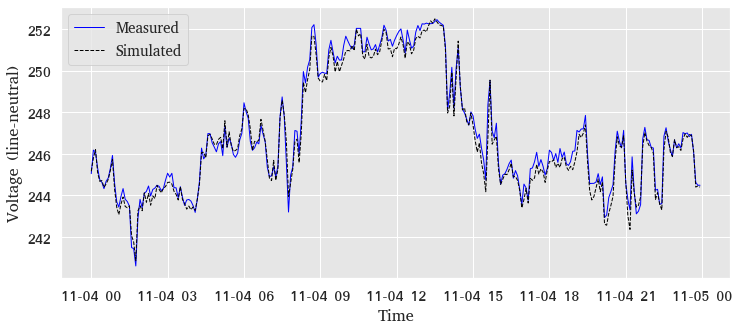

In [39]:
plot_measured_actual(volts_before,'IF_Vc')

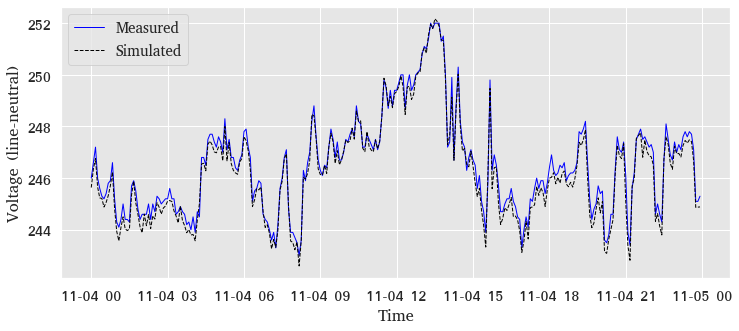

In [40]:
plot_measured_actual(volts_before,'DR_Va')

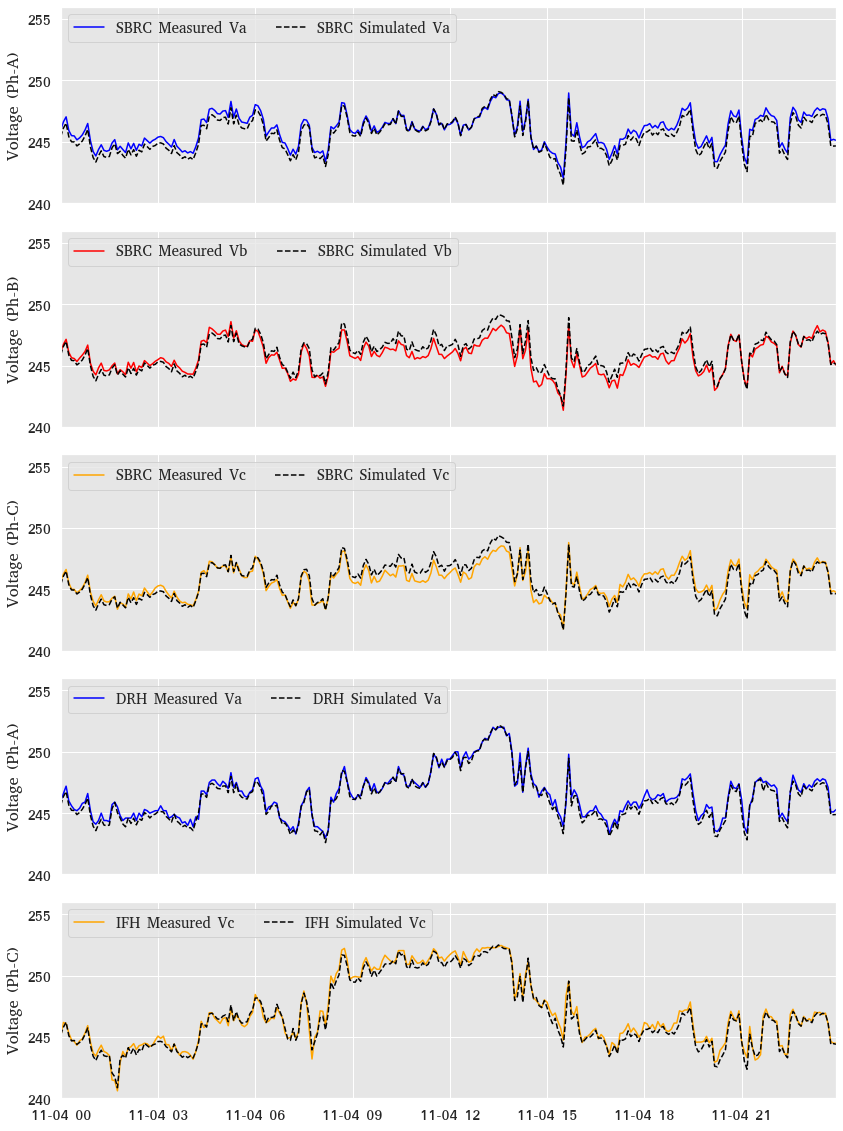

In [56]:
plot3ph_measured_actual(volts_before)

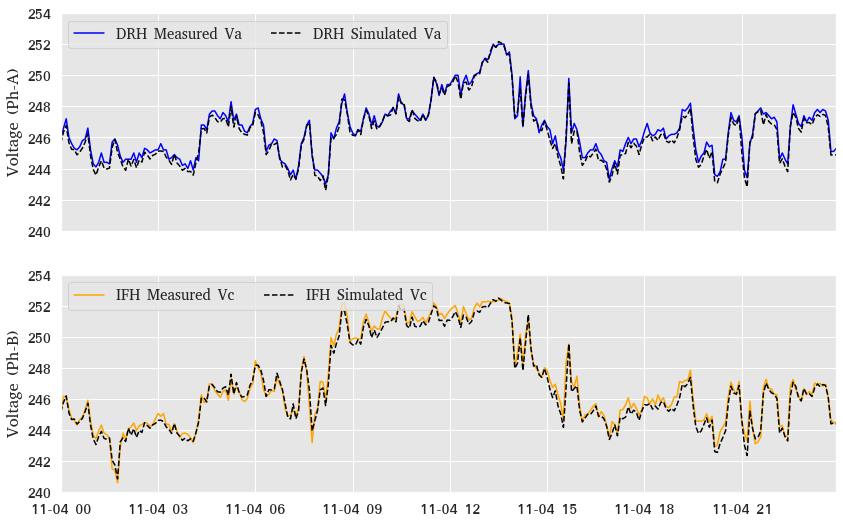

In [42]:
plot_sdhouses_measured_actual(volts_before)

## RMSE of Measured vs Simulated

#### DRH

In [ ]:
np.sqrt(mean_squared_error(mg.loc[sim_date]['DR_Va'], volts_before['DR_Va']))

In [ ]:
r2_score(mg.loc[sim_date]['DR_Va'], volts_before['DR_Va'])

#### IFH

In [ ]:
np.sqrt(mean_squared_error(mg.loc[sim_date]['IF_Vc'], volts_before['IF_Vc']))

In [ ]:
r2_score(mg.loc[sim_date]['IF_Vc'], volts_before['IF_Vc'])

#### SBRC

In [ ]:
np.sqrt(mean_squared_error(mg.loc[sim_date]['SB_Va'], volts_before['SB_Va']))

In [ ]:
np.sqrt(mean_squared_error(mg.loc[sim_date]['SB_Vb'], volts_before['SB_Vb']))

In [ ]:
np.sqrt(mean_squared_error(mg.loc[sim_date]['SB_Vc'], volts_before['SB_Vc']))

In [ ]:
r2_score(mg.loc[sim_date]['SB_Va'], volts_before['SB_Va'])

In [ ]:
r2_score(mg.loc[sim_date]['SB_Vb'], volts_before['SB_Vb'])

In [ ]:
r2_score(mg.loc[sim_date]['SB_Vc'], volts_before['SB_Vc'])